In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

import torchvision
from torchvision import datasets, transforms

In [2]:
transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                        batch_size=32,
                                        shuffle=True)

In [87]:
# class AE(nn.Module):
#     def __init__(self):
#         super().__init__()
        
#         self.encoder = nn.Sequential(
#             nn.Linear(784, 128),
#             nn.ReLU(),
#             nn.Linear(128, 64),
#             nn.ReLU(),
#             nn.Linear(64, 12),
#             nn.ReLU(),
#             nn.Linear(12, 3)
#         )
        
#         self.decoder = nn.Sequential(
#             nn.Linear(3, 12),
#             nn.ReLU(),
#             nn.Linear(12, 64),
#             nn.ReLU(),
#             nn.Linear(64, 128),
#             nn.ReLU(),
#             nn.Linear(128, 784),
#             nn.Sigmoid()
#         )
        
#     def forwardPass(self,x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded
    
class AE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    

In [88]:
model = AE()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.MSELoss()

AttributeError: cannot assign module before Module.__init__() call

In [89]:
data=iter(data_loader)

In [92]:
numE = 10
outputs = []

for i in range(numE):
    for (img, __) in data_loader:
        img = img.reshape(-1,28*28)
        output = model(img)
        loss = criterion(output, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    outputs.append((i, output, img))
    print(f'Epoch{i+1}, Loss: {loss.item():.4f}')

Epoch1, Loss: 0.0493
Epoch2, Loss: 0.0430
Epoch3, Loss: 0.0417
Epoch4, Loss: 0.0432
Epoch5, Loss: 0.0333
Epoch6, Loss: 0.0401
Epoch7, Loss: 0.0359
Epoch8, Loss: 0.0354
Epoch9, Loss: 0.0316
Epoch10, Loss: 0.0329


In [3]:
class CAE(nn.Module):
    def __init__(self):
        super().__init__() #super
        
        #layers
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 5),
            nn.Conv2d(32, 64, 5),
            nn.Conv2d(64, 128, 5),
        )
        
        self.decoder = nn.Sequential(
            nn.Conv2d(128, 64, 5),
            nn.Conv2d(64, 32, 5),
            nn.Conv2d(32, 1, 5),
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [4]:
conv = CAE()
numE = 10
outputs = []

for i in range(numE):
    for (img, __) in data_loader:
        #img = img.reshape(-1,28*28)
        output = conv(img)
        loss = criterion(output, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    outputs.append((i, output, img))
    print(f'Epoch{i+1}, Loss: {loss.item():.4f}')

NameError: name 'criterion' is not defined

In [6]:
img, label = data.next()
print(img, label)
image = img[0]
test = conv(img[0].reshape(-1,1,28,28))
test.shape

NameError: name 'data' is not defined

In [116]:
image.shape

torch.Size([1, 28, 28])

In [5]:
type(image)

NameError: name 'image' is not defined

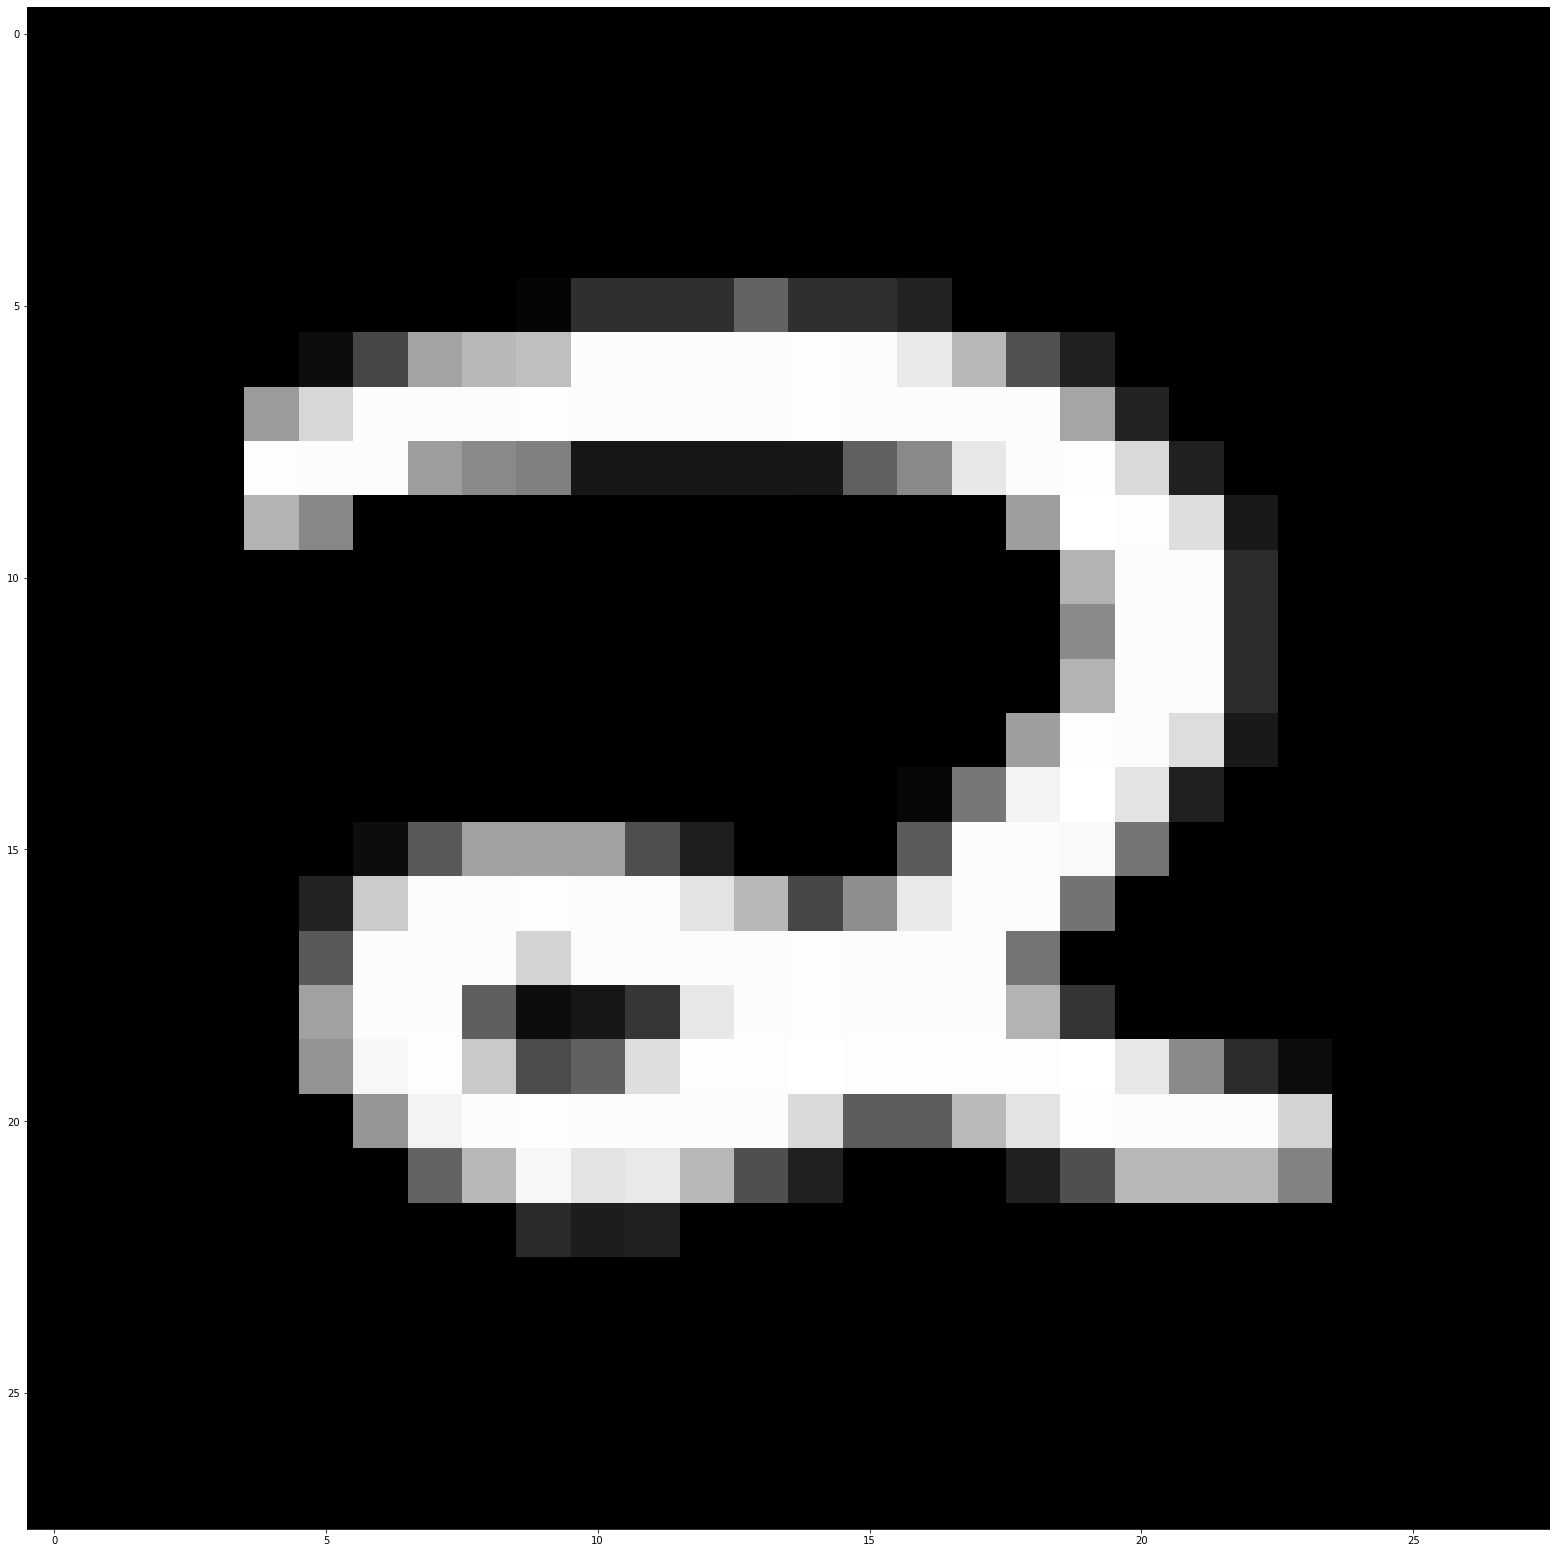

In [134]:
#image = image.numpy()
plt.figure(figsize=(28,28))
#librosa.display.specshow(data[], x_axis = "time", y_axis = "mel", sr=22050)

#plt.colorbar(format="%+2.f")
plt.imshow(image.squeeze(), cmap = 'gray')
plt.show()

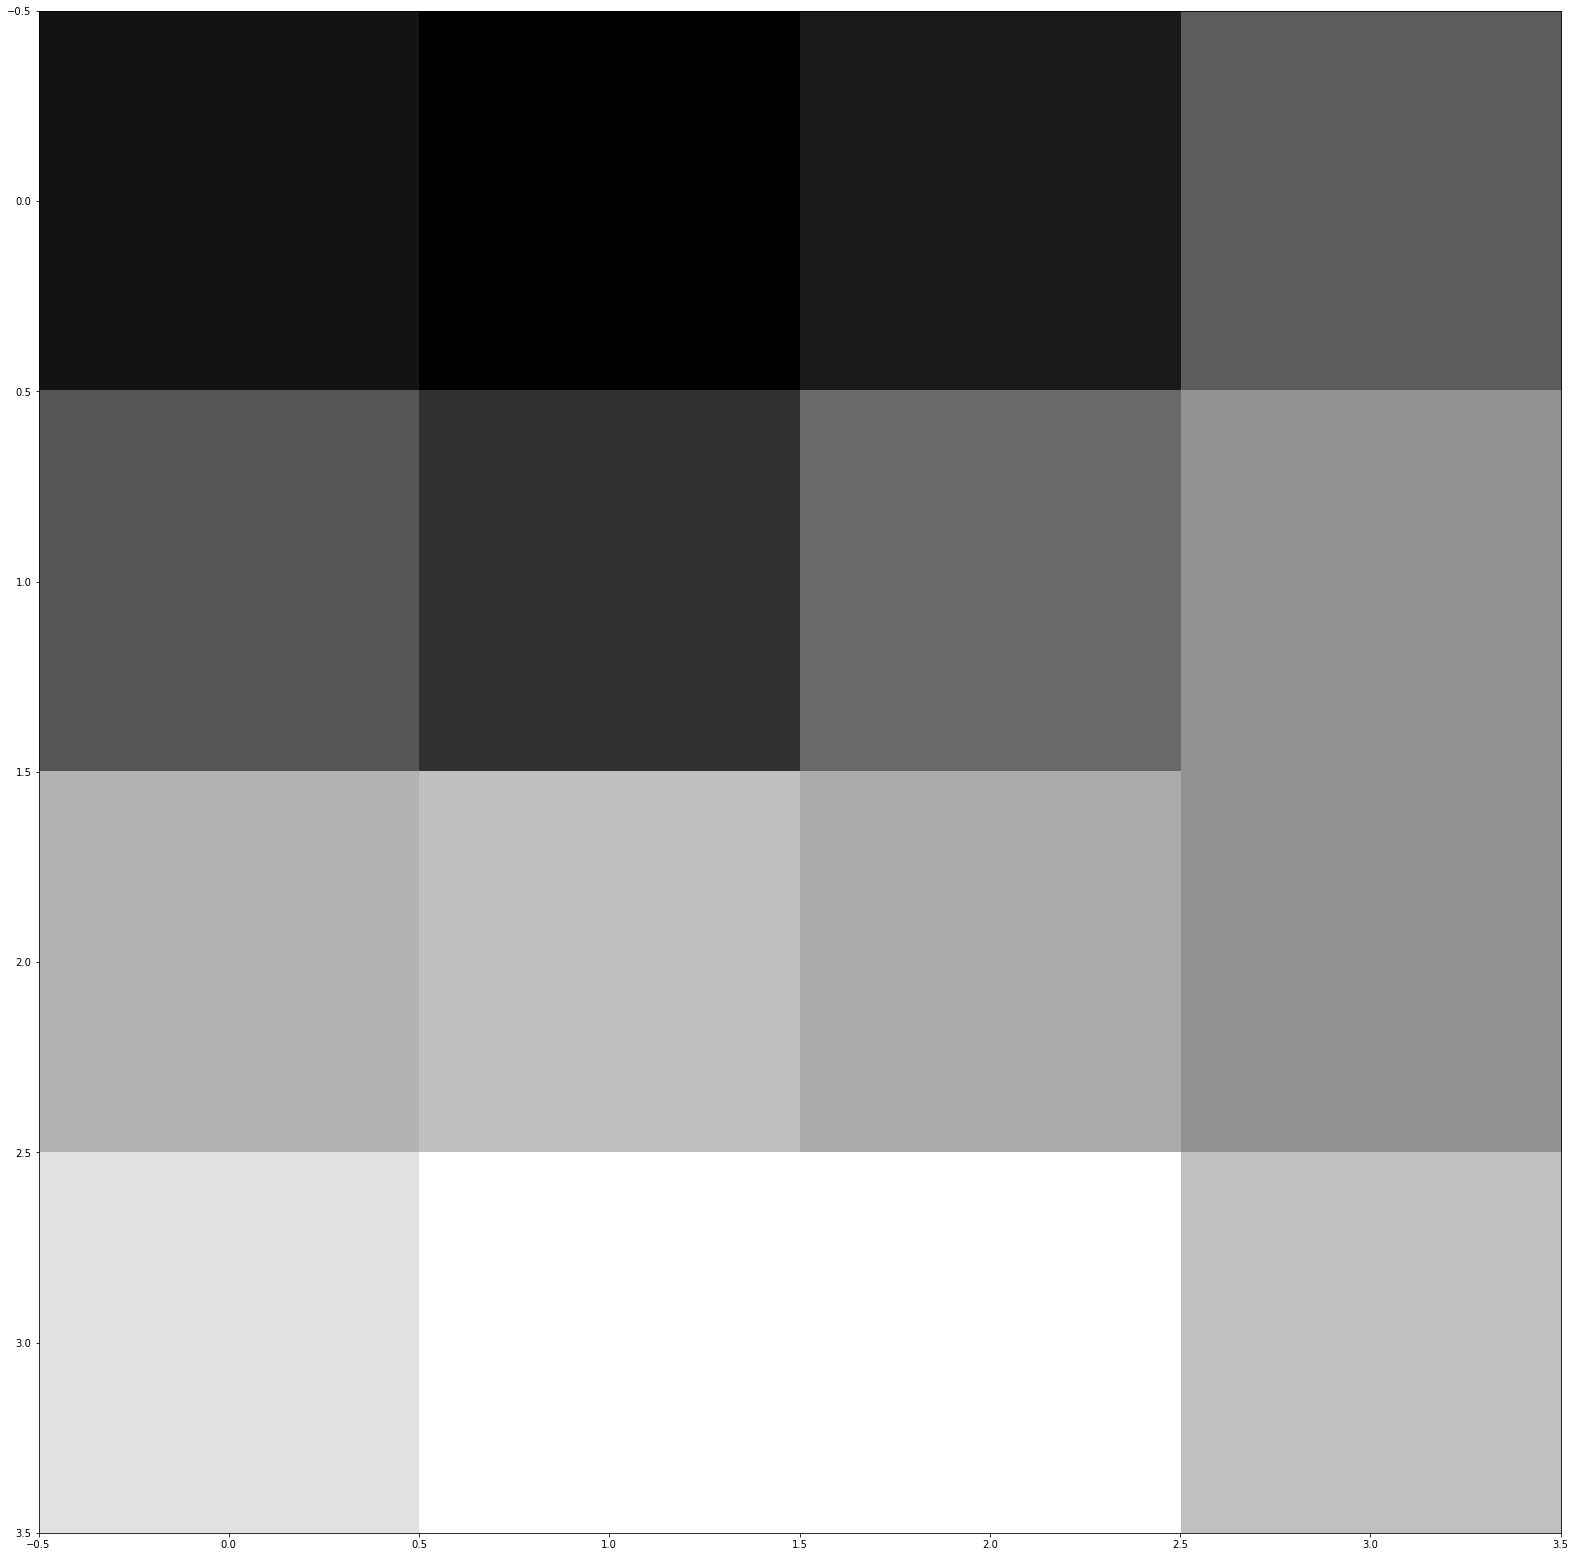

In [145]:
#image = image.numpy()
plt.figure(figsize=(28,28))
#librosa.display.specshow(data[], x_axis = "time", y_axis = "mel", sr=22050)

#test = test.numpy()

#plt.colorbar(format="%+2.f")
plt.imshow(test.detach().numpy().reshape(4,4), cmap = 'gray')
#plt.show()